<a href="https://colab.research.google.com/github/yazim1/Data-Science-and-Analytics-final-year-project/blob/main/RFRModelFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook contains the python code for The Random Forest regressor model to predict the price of Gold

#Firstly importing the libraries required for the model, after being pip installed in the command prompt

In [ ]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


#Importing the dataset from yahoo finance directly

In [ ]:
#Importing the dataset from yahoo finance with stock ticker symbol 'GC=F' between the dates 1st jan 2012 and 3rd jan 2021 (9 years).
#Saving the dataset in a variable called 'df'.
df = yf.download('GC=F', start='2012-01-01', end='2021-01-04')


[*********************100%%**********************]  1 of 1 completed


#Data pre-proccessing and preparation

---
#Creating the dataframes

In [ ]:
#Now creating the target feature ('Close price') where we shift by 1 day backwards, this allows to predcit the next days price.
df['Target'] = df['Close'].shift(-1)

#Now dropping the last row as it will have an null value for the target as we have shifted it.
df = df[:-1]


In [ ]:
#Saving the feautures from the original dataset into a variable called so we can use for the RFR model.
features = ['Open', 'High', 'Low','Volume','Adj Close']
#Creating a dataframe containing the features and savin in a avariable called 'x'.
X = df[features]
#saving the 'target dataframe in a variable called 'y'.
y = df['Target']

#Splitting data into train and test sets

In [ ]:
#Now splitting the data into training and testing sets.
#Now to create an 80/20 split for the dataset, the first 80% will be used for training  and the other 20% will be used for testing.
split_index = int(len(df) * 0.7)
#Now saving the split data into x and y train and test sets in there own variables.
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



#Creating the RFR model

In [ ]:
#Now initializing the Random Forest Regressor.
#'n_estimators' is the number of trees and can be tuned.
model = RandomForestRegressor(n_estimators=250, max_depth =10, min_samples_split=5, random_state=42)

#now training/fitting the model using the x and y training sets we created earlier
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=250,
                      random_state=42)

#Making predictions

In [ ]:
#Now making predictions
predictions = model.predict(X_test)

#printing out the prediction for 4th January 2021
print("Predicted Close Price for 4th January 2021:", predictions[-1])
print("Actual Close Price for 4th January 2021:", df['Close'][-1])

#reseting y_test's index for alignment
y_test = y_test.reset_index(drop=True)

#Now creating a DataFrame with both the original and the predicted values to compare and plot.
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df)



Predicted Close Price for 4th January 2021: 1754.4124697249417
Actual Close Price for 4th January 2021: 1891.0
          Actual    Predicted
0    1331.400024  1325.923730
1    1321.199951  1331.643457
2    1316.300049  1322.660461
3    1320.300049  1322.242285
4    1316.199951  1320.364976
..           ...          ...
674  1879.900024  1753.838249
675  1877.199951  1750.788672
676  1879.699951  1753.548436
677  1891.000000  1754.412470
678  1893.099976  1754.412470

[679 rows x 2 columns]


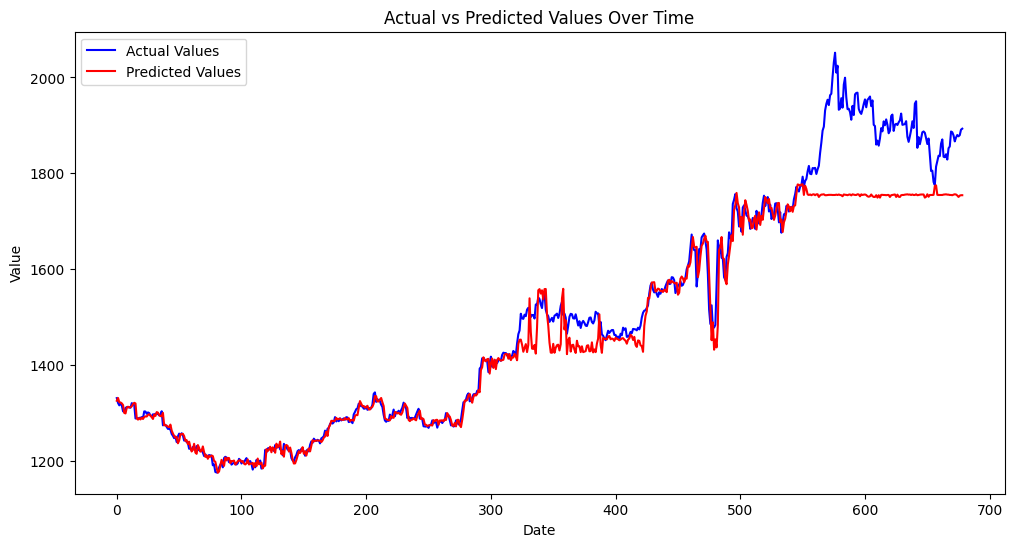

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#evaluating the model

In [ ]:
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.9207561638556485
Mean Absolute Error (MAE): 38.92042309210206
Mean Squared Error (MSE): 4771.852544595819
Root Mean Squared Error (RMSE): 69.07859686325294
